# Step 4: Pre-processing

## Introduction

## Imported Libraries and Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy")
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression

## Data

In [2]:
df = pd.read_csv('collegedata_EDAd.csv')
print(df.head(2))

                             chronname        city    state   level control  \
0               Alabama A&M University      Normal  Alabama  4-year  Public   
1  University of Alabama at Birmingham  Birmingham  Alabama  4-year  Public   

                                               basic hbcu flagship  \
0  Masters Colleges and Universities--larger prog...  yes       no   
1  Research Universities--very high research acti...   no       no   

   student_count  awards_per_value  ...  pell_percentile  retain_value  \
0         4051.0              14.2  ...             98.0          63.1   
1        11502.0              20.9  ...             39.0          80.2   

   retain_percentile  ft_fac_value  ft_fac_percentile  state_sector_ct  \
0               17.0          82.8               89.0             13.0   
1               70.0          92.4               98.0             13.0   

   carnegie_ct  counted_pct  cohort_size  num_similar  
0          386         99.7        882.0         

In [3]:
print(df.shape)

(3798, 40)


In [4]:
print(df.columns)

Index(['chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu',
       'flagship', 'student_count', 'awards_per_value',
       'awards_per_state_value', 'awards_per_natl_value', 'exp_award_value',
       'exp_award_state_value', 'exp_award_natl_value', 'exp_award_percentile',
       'ft_pct', 'fte_value', 'fte_percentile', 'med_sat_value',
       'med_sat_percentile', 'aid_value', 'aid_percentile', 'endow_value',
       'endow_percentile', 'grad_100_value', 'grad_100_percentile',
       'grad_150_value', 'grad_150_percentile', 'pell_value',
       'pell_percentile', 'retain_value', 'retain_percentile', 'ft_fac_value',
       'ft_fac_percentile', 'state_sector_ct', 'carnegie_ct', 'counted_pct',
       'cohort_size', 'num_similar'],
      dtype='object')


In [5]:
names_list = ['chronname', 'city', 'state']
df.drop(columns=names_list, inplace=True)
print(df.shape)

(3798, 37)


In [6]:
df.level.unique()

array(['4-year', '2-year'], dtype=object)

In [7]:
#Dummy encoding 
df = pd.get_dummies(df, columns=['level'], drop_first=False, prefix='level')

#Rename
df.rename(columns={
    'level_2-year':'2_yr_inst',
    'level_4-year':'4_yr_inst'
}, inplace=True)

In [8]:
df.control.unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [9]:
df = pd.get_dummies(df, columns=['control'], drop_first=False, prefix='c')
#Rename
df.rename(columns={
    'c_Public':'public',
    'c_Private not-for-profit':'private',
    'c_Private for-profit':'private_fp'
}, inplace=True)

In [10]:
df.hbcu.unique()

array(['yes', 'no'], dtype=object)

In [11]:
df = pd.get_dummies(df, columns=['hbcu'], drop_first=False)

In [12]:
df.flagship.unique()

array(['no', 'yes'], dtype=object)

In [13]:
df = pd.get_dummies(df, columns=['flagship'], drop_first=False)

In [14]:
print(df.columns)

Index(['basic', 'student_count', 'awards_per_value', 'awards_per_state_value',
       'awards_per_natl_value', 'exp_award_value', 'exp_award_state_value',
       'exp_award_natl_value', 'exp_award_percentile', 'ft_pct', 'fte_value',
       'fte_percentile', 'med_sat_value', 'med_sat_percentile', 'aid_value',
       'aid_percentile', 'endow_value', 'endow_percentile', 'grad_100_value',
       'grad_100_percentile', 'grad_150_value', 'grad_150_percentile',
       'pell_value', 'pell_percentile', 'retain_value', 'retain_percentile',
       'ft_fac_value', 'ft_fac_percentile', 'state_sector_ct', 'carnegie_ct',
       'counted_pct', 'cohort_size', 'num_similar', '2_yr_inst', '4_yr_inst',
       'private_fp', 'private', 'public', 'hbcu_no', 'hbcu_yes', 'flagship_no',
       'flagship_yes'],
      dtype='object')


In [15]:
counts = df.basic.value_counts()
print(counts)

basic
Associates--Private For-profit                                                  517
Masters Colleges and Universities--larger programs                              386
Baccalaureate Colleges--Diverse Fields                                          343
Associates--Public Rural-serving Medium                                         289
Baccalaureate Colleges--Arts & Sciences                                         252
Masters Colleges and Universities--medium programs                              169
Associates--Public Rural-serving Large                                          128
Associates--Public Urban-serving Multicampus                                    125
Baccalaureate/Associates Colleges                                               124
Schools of art- music- and design                                               114
Associates--Public Rural-serving Small                                          111
Associates--Public Suburban-serving Single Campus                     

In [16]:
#Limit columns in 'basic'
mask = df['basic'].isin(counts[counts <=114].index)
df['basic'][mask] = 'Other'
df.basic.unique()

C:\Users\MTIDES\AppData\Local\Temp\ipykernel_11960\1496826063.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['basic'][mask] = 'Other'


array(['Masters Colleges and Universities--larger programs', 'Other',
       'Baccalaureate Colleges--Arts & Sciences',
       'Associates--Public Rural-serving Medium',
       'Baccalaureate Colleges--Diverse Fields',
       'Baccalaureate/Associates Colleges',
       'Associates--Public Rural-serving Large',
       'Associates--Public Urban-serving Multicampus',
       'Masters Colleges and Universities--medium programs',
       'Associates--Private For-profit'], dtype=object)

In [17]:
#Dummy encoding 
df = pd.get_dummies(df, columns=['basic'], drop_first=False, prefix='B')

#Rename
df.rename(columns={
    'B_Masters Colleges and Universities--larger programs':'masters_lp',
    'B_Baccalaureate Colleges--Arts & Sciences':'bachelors_as',
    'B_Associates--Public Rural-serving Medium':'associates_pr_sm',
    'B_Baccalaureate Colleges--Diverse Fields':'bacelors_df',
    'B_Baccalaureate/Associates Colleges':'bachelors_associates',
    'B_Associates--Public Rural-serving Large':'associates_pr_sl',
    'B_Associates--Public Urban-serving Multicampus':'associates_pu_multi',
    'B_Masters Colleges and Universities--medium programs':'masters_mp',
    'B_Associates--Private For-profit':'associates_privatefp',
    'B_Other':'Other_institutions'
}, inplace=True)

In [18]:
columns_to_drop = ['exp_award_percentile', 'fte_percentile', 'aid_percentile', 'endow_percentile', 'med_sat_percentile', 
                   'grad_100_percentile', 'grad_150_percentile', 'pell_percentile', 'retain_percentile', 'ft_fac_percentile']
df = df.drop(columns=columns_to_drop)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   student_count           3413 non-null   float64
 1   awards_per_value        3532 non-null   float64
 2   awards_per_state_value  3313 non-null   float64
 3   awards_per_natl_value   2407 non-null   float64
 4   exp_award_value         3580 non-null   float64
 5   exp_award_state_value   3657 non-null   float64
 6   exp_award_natl_value    3798 non-null   int64  
 7   ft_pct                  3798 non-null   float64
 8   fte_value               3417 non-null   float64
 9   med_sat_value           2461 non-null   float64
 10  aid_value               3425 non-null   float64
 11  endow_value             3616 non-null   float64
 12  grad_100_value          3750 non-null   float64
 13  grad_150_value          3798 non-null   float64
 14  pell_value              3798 non-null   

## Target Variable

In [19]:
df['awards_per_value'].describe()

count    3532.000000
mean       21.491110
std         6.849469
min         3.600000
25%        17.000000
50%        20.900000
75%        25.025000
max        40.300000
Name: awards_per_value, dtype: float64

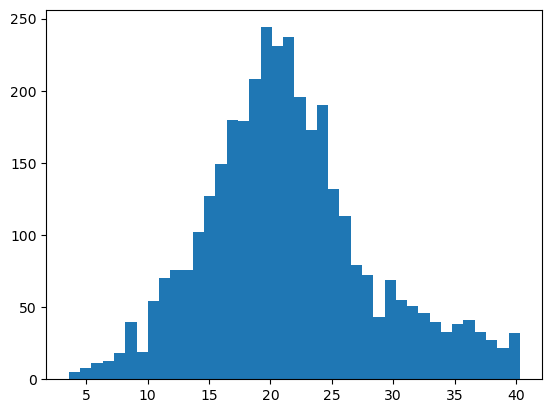

In [20]:
plt.hist(df['awards_per_value'], bins=40)
plt.show();